In [1]:
import os
import numpy as np
import pandas as pd
path = 'batch_run_2/'
bla = os.listdir('batch_run_2/')
bla.sort()
runs = []
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
from matplotlib.lines import Line2D
%matplotlib inline
from SALib.analyze import sobol

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 200
sobol_run = pd.read_csv('Sobol_goedyo.csv')
problem = {'num_vars': 3,
           'names': ['spawn', 'agression', 'min_gap'],
           'bounds': [[0.3, 0.8], [0.2, 0.8], [0.5, 2.0]]}

In [4]:
os.chdir('../../src')

In [5]:
os.listdir()

['server.py',
 'batch_run.py',
 'cargrid.py',
 'lanes.js',
 'run.py',
 'lane_canvas.py',
 'Sobol_result.csv',
 'data_collection.py',
 'modelgrid.py',
 'plots',
 'SA.py',
 'Sobol_goedyo.csv',
 'lane_grid.py',
 '__pycache__']

In [6]:
Si_Speed = sobol.analyze(problem, sobol_run['Total_Avg_speed'].as_matrix(), print_to_console=False)
Si_Cars = sobol.analyze(problem, sobol_run['Total_Cars_in_lane'].as_matrix(), print_to_console=False)

/home/coen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/coen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [7]:
from SA import plot_index

In [8]:
typename = ["Average_speed", "Number_of_cars"]

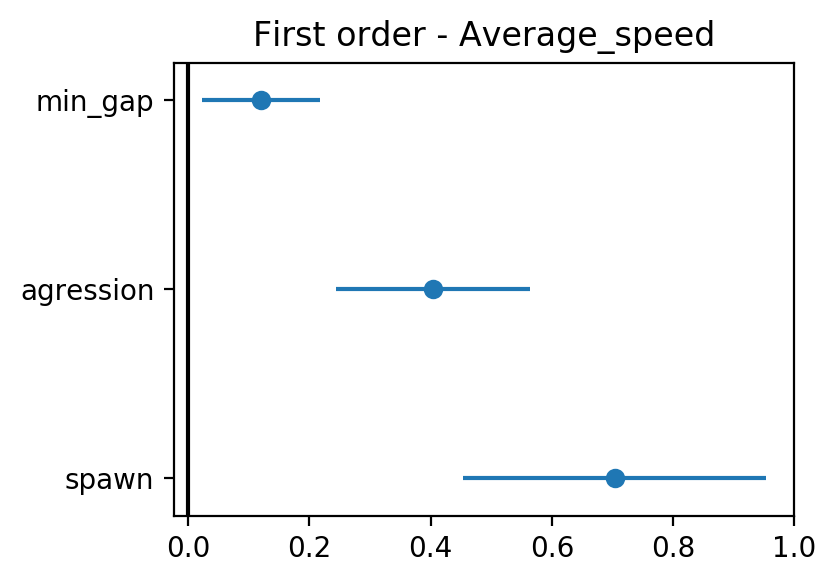

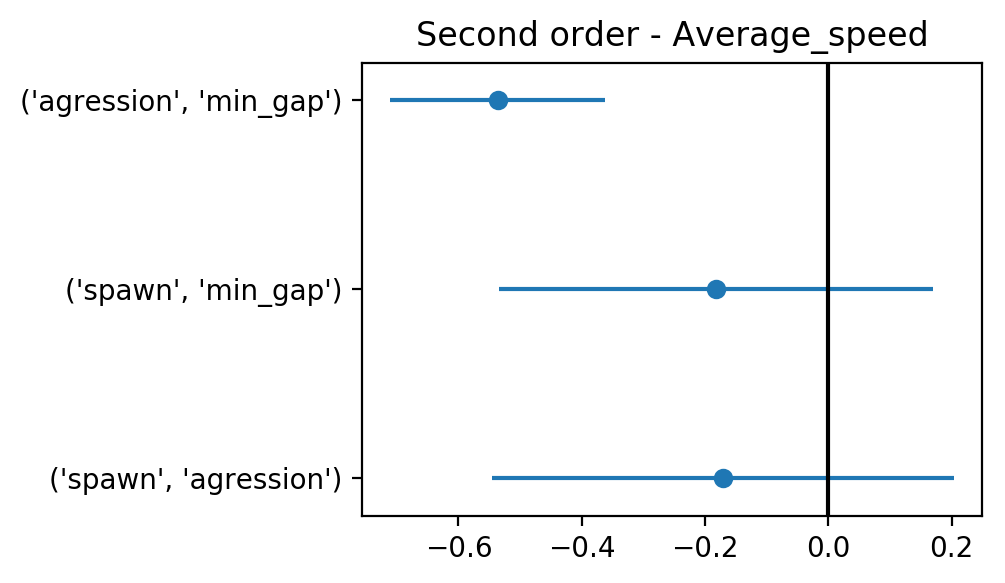

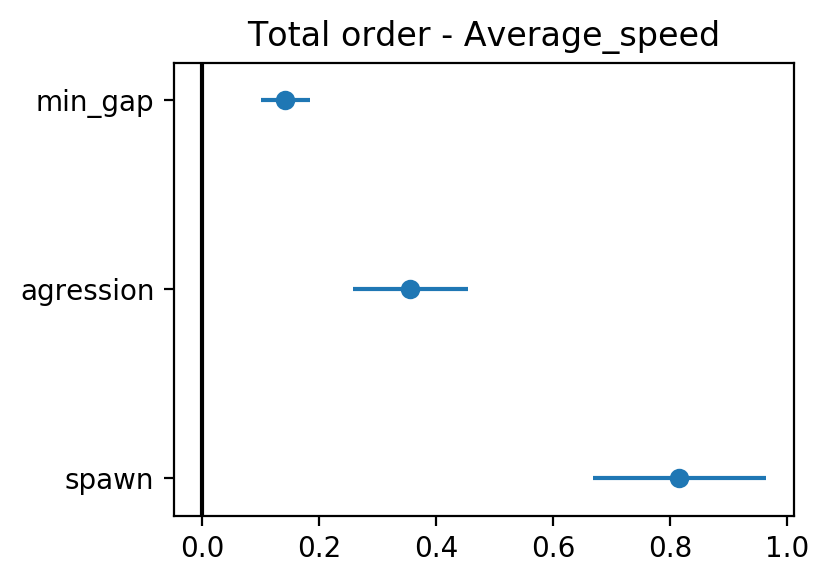

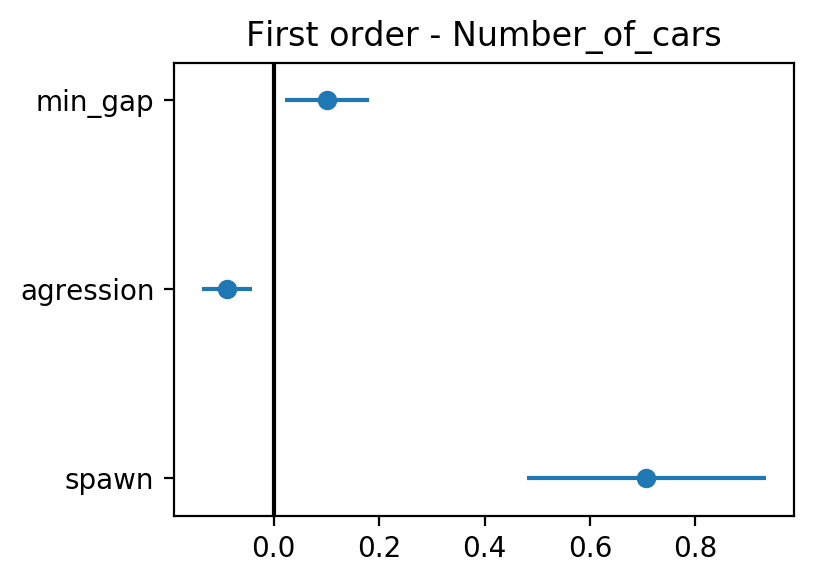

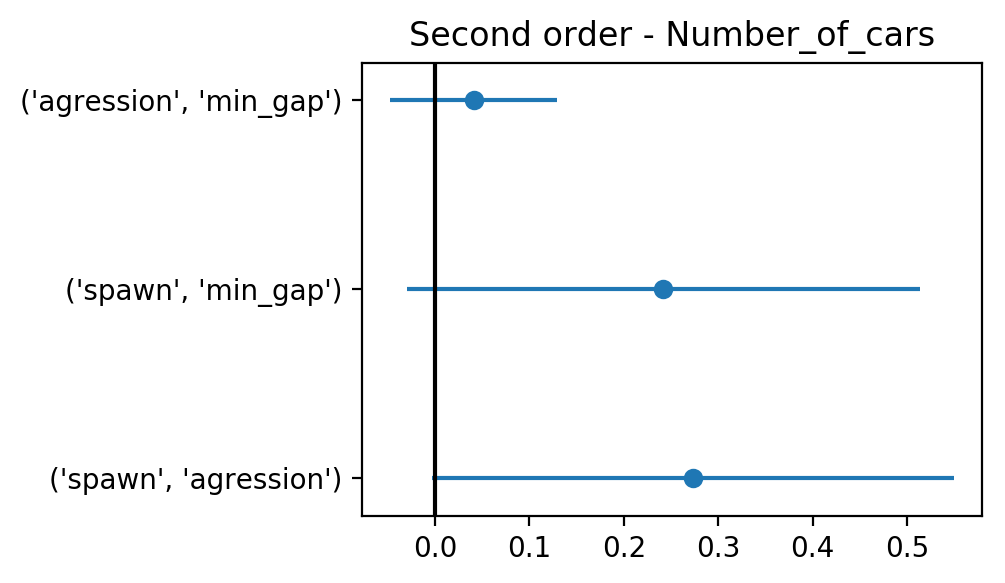

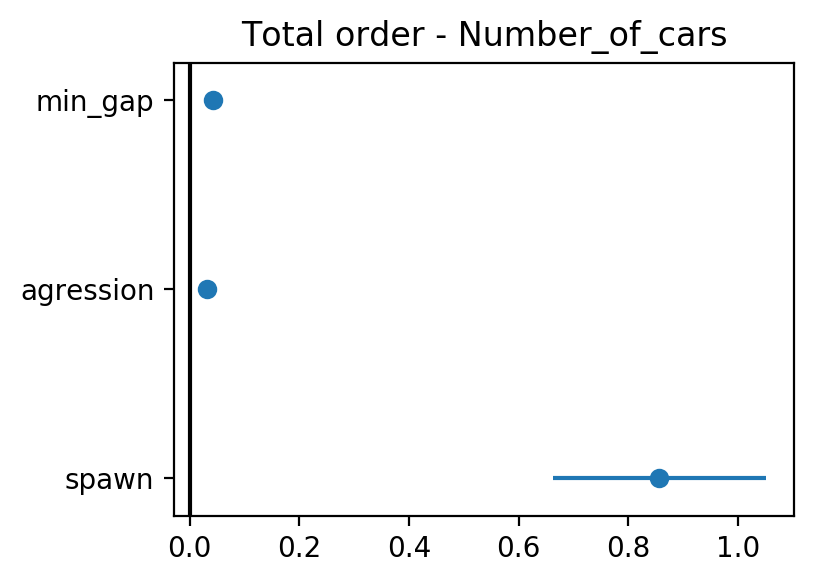

In [15]:
for i, Si in enumerate((Si_Speed, Si_Cars)):
  plot_index(Si, problem['names'], '1', 'First order - '+typename[i])
  plt.show()
  plot_index(Si, problem['names'], '2', 'Second order - '+typename[i])
  plt.show()
  plot_index(Si, problem['names'], 'T', 'Total order - '+typename[i])
  plt.show()

In [ ]:
for file in bla:
  runs.append(pd.read_csv(path+file))

In [ ]:
means = []
stds = []
for run in runs:
  means.append(run.mean())
  stds.append(run.std())

In [ ]:
means2 = means[:-1]
stds2 = stds[:-1]

In [ ]:
df = pd.DataFrame(means2)
dfs = pd.DataFrame(stds2)

In [ ]:
df['avg_speed_std'] = dfs['avg_speed']
df['cars_in_lane_std'] = dfs['cars_in_lane']

In [ ]:
df

In [ ]:
def std_error_calc(x,y):
    unique_values = x.unique().tolist()
    unique_values.sort()
    positions = []
    for i in unique_values:
        counter = 0
        cache = []
        for k in x.tolist():
            if i == k:
                cache.append(counter)
            counter = counter +1
        positions.append(cache)
    values = []
    for i in positions:
        cache = []
        for k in i:
            cache.append(y.tolist()[k])
        values.append(cache)
    errors = []
    means = []
    for i in values:
        errors.append(1.96*np.std(i)/np.sqrt(len(i)))
        means.append(np.mean(i))
    return np.asarray(unique_values),np.asarray(means),np.asarray(errors)

In [ ]:
ofat1 = df.loc[(df['spawn_chance'] > 0.3) & (df['spawn_chance'] < 0.5)]
ofat1 = ofat1.loc[(ofat1['agression'] >0.4) & (ofat1['agression'] < 0.6)]

fig, ax1 = plt.subplots()
x,y,errors = std_error_calc(ofat1['min_gap'],ofat1['avg_speed'])
ax1.plot(x,y, marker = 'o', c = 'r')
ax1.fill_between(x, y - errors,y+errors, color = 'r', alpha = 0.5)

ax1.set_xlabel('Minimal gap [m]')
ax1.set_ylabel('Average speed [km/h]')
ax1.legend(('Average speed',), loc = 1)
ax2 = ax1.twinx()
x,y,errors = std_error_calc(ofat1['min_gap'],ofat1['cars_in_lane'])

ax2.plot(x,y, marker = 'o', c = '#1f77b4')
ax2.fill_between(x, y - errors,y+errors, color = '#1f77b4', alpha = 0.5)
ax1.legend(('Average speed',), loc = 1)
ax2.legend(('Cars per lane',), loc = 4)
ax2.set_ylabel('Cars per lane')

fig.tight_layout()
plt.show()


In [ ]:
ofat1 = df.loc[(df['min_gap'] > 2.1) & (df['min_gap'] < 2.6)]
ofat1 = ofat1.loc[(ofat1['agression'] >0.4) & (ofat1['agression'] < 0.6)]

fig, ax1 = plt.subplots()
x,y,errors = std_error_calc(ofat1['spawn_chance'],ofat1['avg_speed'])
ax1.plot(x,y, marker = 'o', c = 'r')
ax1.fill_between(x, y - errors,y+errors, color = 'r', alpha = 0.5)

ax1.set_xlabel('Spawn')
ax1.set_ylabel('Average speed [km/h]')
ax1.legend(('Average speed',), loc = 1)
ax2 = ax1.twinx()
x,y,errors = std_error_calc(ofat1['spawn_chance'],ofat1['cars_in_lane'])

ax2.plot(x,y, marker = 'o', c = '#1f77b4')
ax2.fill_between(x, y - errors,y+errors, color = '#1f77b4', alpha = 0.5)
ax1.legend(('Average speed',), loc = 8)
ax2.legend(('Cars per lane',), loc = 2)
ax2.set_ylabel('Cars per lane')

fig.tight_layout()
plt.show()


In [ ]:
ofat1 = df.loc[(df['spawn_chance'] > 0.3) & (df['spawn_chance'] < 0.5)]
ofat1 = df.loc[(df['min_gap'] > 2.1) & (df['min_gap'] < 2.6)]

fig, ax1 = plt.subplots()
x,y,errors = std_error_calc(ofat1['agression'],ofat1['avg_speed'])
ax1.plot(x,y, marker = 'o', c = 'r')
ax1.fill_between(x, y - errors,y+errors, color = 'r', alpha = 0.5)

ax1.set_xlabel('Agression')
ax1.set_ylabel('Average speed [km/h]')
ax1.legend(('Average speed',), loc = 1)
ax2 = ax1.twinx()
x,y,errors = std_error_calc(ofat1['agression'],ofat1['cars_in_lane'])

ax2.plot(x,y, marker = 'o', c = '#1f77b4')
ax2.fill_between(x, y - errors,y+errors, color = '#1f77b4', alpha = 0.5)
ax1.legend(('Average speed',), loc = 8)
ax2.legend(('Cars per lane',), loc = 2)
ax2.set_ylabel('Cars per lane')

fig.tight_layout()
plt.show()


In [ ]:
driedee = plt.figure(figsize=(5,5)).gca(projection='3d')
x_as = 'agression'
y_as = 'min_gap'
z_as = 'cars_in_lane'
kleur = 'cars_in_lane_std'
p = driedee.scatter(df[x_as], df[y_as], df[z_as], c=df[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['agression'], df['avg_speed'])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['min_gap'], df['avg_speed'])
plt.show()

In [ ]:
run3 = pd.read_csv('br3.csv')

In [ ]:
run3.drop(run3.columns[0], axis=1, inplace=True)

In [ ]:
run3_group = run3.groupby('Run')

In [ ]:
import numpy as np
s3 = run3_group.agg([np.mean, np.std])

In [ ]:
s3

In [ ]:
s3.columns

In [ ]:
driedee = plt.figure(figsize=(4,4)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_rate'
z_as = 'Avg_speed'
kleur = 'Avg_speed'
p = driedee.scatter(1-s3[x_as,'mean'], s3[y_as,'mean'], s3[z_as,'mean'], c=s3[kleur,'std'])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [ ]:
df['agression']

In [ ]:
run_lanes = pd.read_csv('batch_run_lanes.csv')

In [ ]:
run_lanes.drop(run_lanes.columns[0], axis=1, inplace=True)

In [ ]:
run_lanes_group = run_lanes.groupby('Run')

In [ ]:
rlg_5000 = run_lanes_group.tail(5000).groupby('Run')

In [ ]:
import numpy as np
rlanes = rlg_5000.agg(np.mean)

In [ ]:
rlanes

In [ ]:
rl2 = pd.read_csv('batch_lanes_2.csv')
rl2.drop(rl2.columns[0], axis=1, inplace=True)
rl2g = rl2.groupby('Run')
rl2g = rl2g.tail(5000).groupby('Run')
rl2gm = rl2g.agg(np.mean)

In [ ]:
rl3 = pd.read_csv('batch_run_lanes_Toby.csv')
rl3.drop(rl3.columns[0], axis=1, inplace=True)
rl3g = rl3.groupby('Run')
rl3g = rl3g.tail(4000).groupby('Run')
rl3gm = rl3g.agg(np.mean)

In [ ]:
rl4 = pd.read_csv('lanes_local.csv')
rl4.drop(rl4.columns[0], axis=1, inplace=True)
rl4g = rl4.groupby('Run')
rl4g = rl4g.tail(5000).groupby('Run')
rl4gm = rl4g.agg(np.mean)

In [ ]:
rl5 = pd.read_csv('lennart.csv')
rl5.drop(rl5.columns[0], axis=1, inplace=True)
rl5g = rl5.groupby('Run')
rl5g = rl5g.tail(5000).groupby('Run')
rl5gm = rl5g.agg(np.mean)

In [ ]:
rl6 = pd.read_csv('toby2.csv')
rl6.drop(rl6.columns[0], axis=1, inplace=True)
rl6g = rl6.groupby('Run')
rl6g = rl6g.tail(5000).groupby('Run')
rl6gm = rl6g.agg(np.mean)

In [ ]:
x_as = 'Avg_speed'
z_as = 'spawn_chance'
y_as = 'Cars_in_lane'
kleur = 'lanes'
plt.figure(figsize=(5,5))
plt.scatter(rl3gm[x_as], rl3gm[y_as], c=rl3gm[kleur])
plt.show()

In [ ]:
driedee = plt.figure(figsize=(5,5)).gca(projection='3d')
x_as = 'agression'
y_as = 'Cars_in_lane'
z_as = 'Avg_speed'
kleur = 'lanes'
p = driedee.scatter(rlanes[x_as], rlanes[y_as], rlanes[z_as], c=rlanes[kleur])
p2 = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
p3 = driedee.scatter(rl3gm[x_as], rl3gm[y_as], rl3gm[z_as], c=rl3gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [ ]:
driedee = plt.figure(figsize=(10,10)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_chance'
z_as = 'Cars_in_lane'
kleur = 'lanes'
p = driedee.scatter(rlanes[x_as], rlanes[y_as], rlanes[z_as], c=rlanes[kleur])
p2 = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
p3 = driedee.scatter(rl3gm[x_as], rl3gm[y_as], rl3gm[z_as], c=rl3gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [ ]:
driedee = plt.figure(figsize=(6,6)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_chance'
z_as = 'Avg_slowdown'
kleur = 'lanes'
p = driedee.scatter(rlanes[x_as], rlanes[y_as], rlanes[z_as], c=rlanes[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [ ]:
rl2 = pd.read_csv('batch_lanes_2.csv')
rl2.drop(rl2.columns[0], axis=1, inplace=True)
rl2g = rl2.groupby('Run')
rl2g = rl2g.tail(5000).groupby('Run')
rl2gm = rl2g.agg(np.mean)

In [ ]:
rl2gm

In [ ]:
driedee = plt.figure(figsize=(6,6)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_chance'
z_as = 'Avg_speed'
kleur = 'lanes'
p = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [ ]:
ofat1 = rlanes.loc[(rlanes['spawn_chance'] >= 0.2) & (rlanes['spawn_chance'] <= 0.4)]
ofat2 = rl2gm.loc[(rl2gm['spawn_chance'] >= 0.2) & (rl2gm['spawn_chance'] <= 0.4)]
ofat3 = rl3gm.loc[(rl3gm['spawn_chance'] >= 0.2) & (rl3gm['spawn_chance'] <= 0.4)]
ofat4 = rl5gm.loc[(rl5gm['spawn_chance'] >= 0.2) & (rl5gm['spawn_chance'] <= 0.4)]
ofat5 = rl6gm.loc[(rl6gm['spawn_chance'] >= 0.2) & (rl6gm['spawn_chance'] <= 0.4)]

In [ ]:
plt.figure(figsize=(4,4))
cmap = plt.cm.viridis
plt.scatter(ofat1['agression'], ofat1['Avg_speed'], c=ofat1['lanes'])
plt.scatter(ofat2['agression'], ofat2['Avg_speed'], c=ofat2['lanes'])
plt.scatter(ofat3['agression'], ofat3['Avg_speed'], c=ofat3['lanes'])
plt.scatter(ofat4['agression'], 100 - ofat4['Avg_speed'], c=ofat4['lanes'])
plt.scatter(ofat4['agression'], 100 - ofat4['Avg_speed'], c=ofat4['lanes'])
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)
plt.xlabel('Agression')
plt.ylabel('Average speed [km/h]')
plt.show()

In [ ]:
rl2gm

In [ ]:
from matplotlib.lines import Line2D
y_as = 'Avg_speed'
x_as = 'Cars_in_lane'
kleur = 'lanes'
cmap = plt.cm.viridis
plt.figure(figsize=(3,3))
plt.scatter(rl2gm[x_as], rl2gm[y_as], c=rl2gm[kleur])
plt.scatter(rl3gm[x_as], rl3gm[y_as], c=rl3gm[kleur])
plt.scatter(rlanes[x_as], rlanes[y_as], c=rlanes[kleur])
plt.scatter(rl4gm[x_as], rl4gm[y_as], c=rl4gm[kleur])
plt.xlabel('Average number of cars')
plt.ylabel('Average speed [km/h]')
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)
plt.show()

In [ ]:
from matplotlib.lines import Line2D
y_as = 'Avg_speed'
x_as = 'Cars_in_lane'
kleur = 'lanes'
cmap = plt.cm.viridis
plt.figure(figsize=(3,3))
plt.scatter(rl2gm[x_as]/rl2gm[kleur], rl2gm[y_as], c=rl2gm[kleur])
plt.scatter(rl3gm[x_as]/rl3gm[kleur], rl3gm[y_as], c=rl3gm[kleur])
plt.scatter(rlanes[x_as]/rlanes[kleur], rlanes[y_as], c=rlanes[kleur])
plt.scatter(rl4gm[x_as]/rl4gm[kleur], rl4gm[y_as], c=rl4gm[kleur])
plt.xlabel('Average number of cars per lane')
plt.ylabel('Average speed [km/h]')
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)
plt.show()